In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
import time


#Đọc và hiển thị thông tin dữ liệu

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/KLTN/Bài toán 2/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
gender_counts = data['gender'].value_counts()

In [ ]:
gender_counts

,count
gender,
Female,58552
Male,41430
Other,18


#Chuyển đổi kiểu dữ liệu cột age


In [ ]:
data['age'].unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [ ]:
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 6.9+ MB


In [ ]:
data['age'].unique()

array([80, 54, 28, 36, 76, 20, 44, 79, 42, 32, 53, 78, 67, 15, 37, 40,  5,
       69, 72,  4, 30, 45, 43, 50, 41, 26, 34, 73, 77, 66, 29, 60, 38,  3,
       57, 74, 19, 46, 21, 59, 27, 13, 56,  2,  7, 11,  6, 55,  9, 62, 47,
       12, 68, 75, 22, 58, 18, 24, 17, 25,  0, 33, 16, 61, 31,  8, 49, 39,
       65, 14, 70, 48, 51, 71, 64, 63, 52, 10, 35, 23,  1])

In [ ]:
age_dtype = data['age'].dtype
age_dtype

dtype('int64')

#Biểu đồ dữ liệu phân loại

Text(0, 0.5, 'Count')

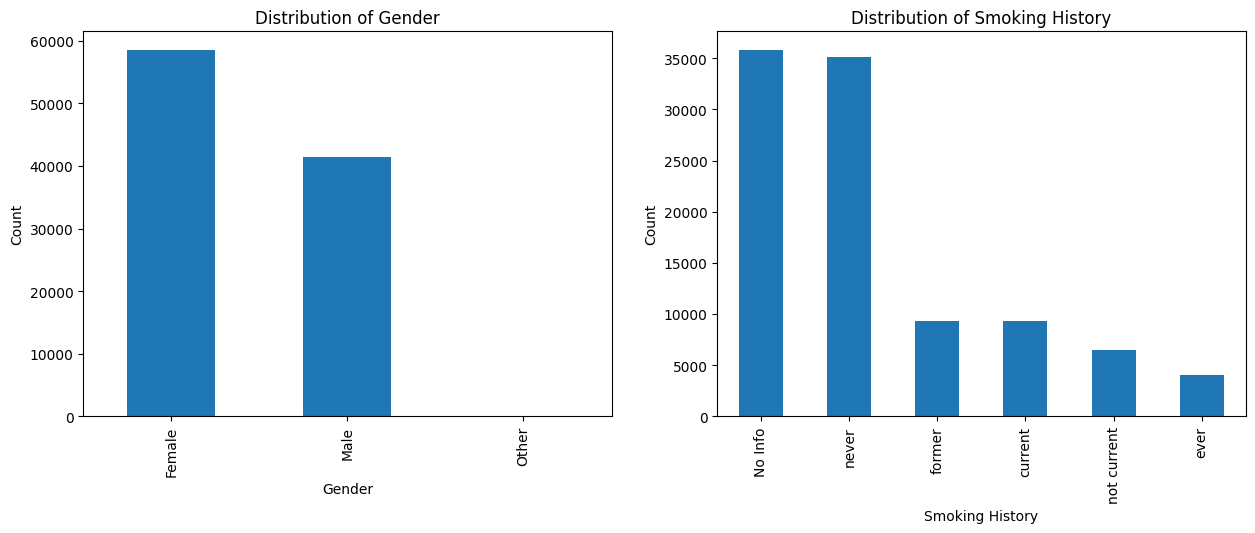

In [ ]:
# Đếm số lượng mỗi loại smoking_history
smoking_counts = data['smoking_history'].value_counts()
gender_counts = data['gender'].value_counts()

# Vẽ biểu đồ thanh
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
gender_counts.plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
smoking_counts.plot(kind='bar')
plt.title('Distribution of Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')


#Trực quan dữ liệu số

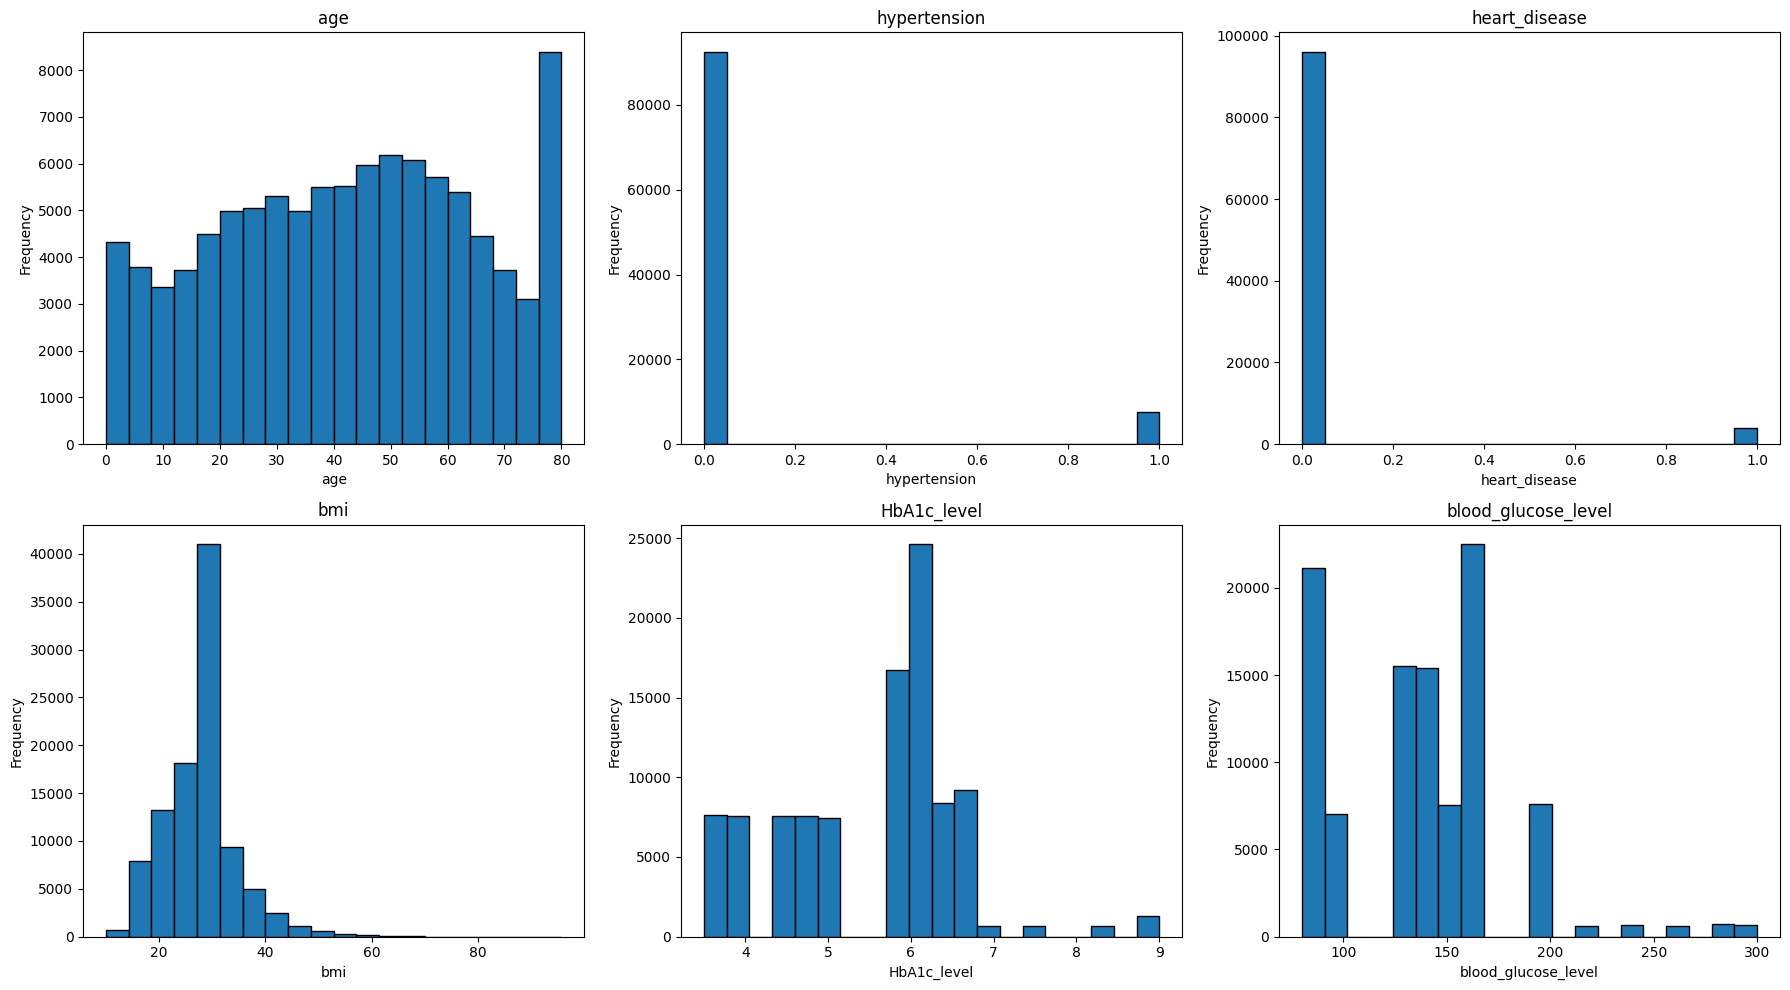

In [ ]:
numeric_columns = ['age', 'hypertension','heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
# Vẽ biểu đồ histogram
plt.figure(figsize=(18,10))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    data[col].hist(bins=20, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)

plt.tight_layout()
plt.show()

#Ma trận tương quan

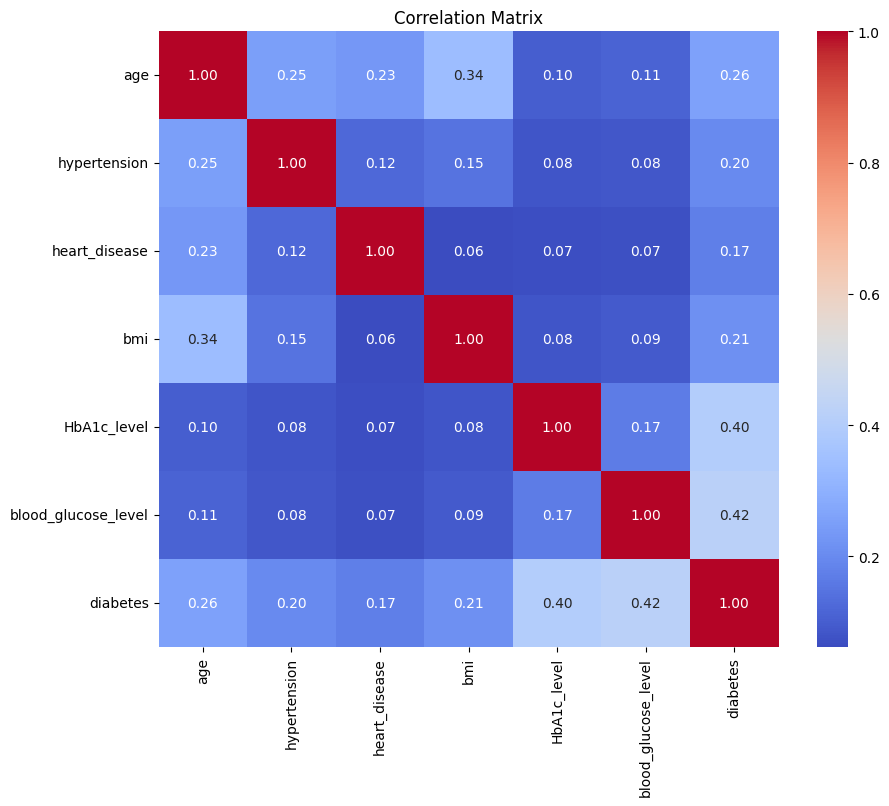

In [ ]:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
# Tính toán ma trận tương quan
correlation_matrix = numeric_columns.corr()
# Vẽ ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **Xử lý giá trị trùng**

In [ ]:
duplicate = data[data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate)}")
duplicate.head()

Number of duplicate rows: 3888


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80,0,0,No Info,27.32,6.6,159,0
3272,Female,80,0,0,No Info,27.32,3.5,80,0
3418,Female,19,0,0,No Info,27.32,6.5,100,0
3939,Female,78,1,0,former,27.32,3.5,130,0
3960,Male,47,0,0,No Info,27.32,6.0,200,0


In [ ]:
data = data.drop_duplicates()
duplicated = data[data.duplicated()]
duplicated

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96112 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96112 non-null  object 
 1   age                  96112 non-null  int64  
 2   hypertension         96112 non-null  int64  
 3   heart_disease        96112 non-null  int64  
 4   smoking_history      96112 non-null  object 
 5   bmi                  96112 non-null  float64
 6   HbA1c_level          96112 non-null  float64
 7   blood_glucose_level  96112 non-null  int64  
 8   diabetes             96112 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 7.3+ MB


# **Kiểm tra giá trị null**

In [ ]:
data.isna().mean()*100

,0
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
smoking_history,0.0
bmi,0.0
HbA1c_level,0.0
blood_glucose_level,0.0
diabetes,0.0


# **Kiểm giá trị ngoại lệ**

In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000
mean,41.798287,0.077628,0.040817,27.321923,5.532618,138.221013,0.088251
std,22.472901,0.267587,0.197867,6.768534,1.073288,40.911287,0.283661
min,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


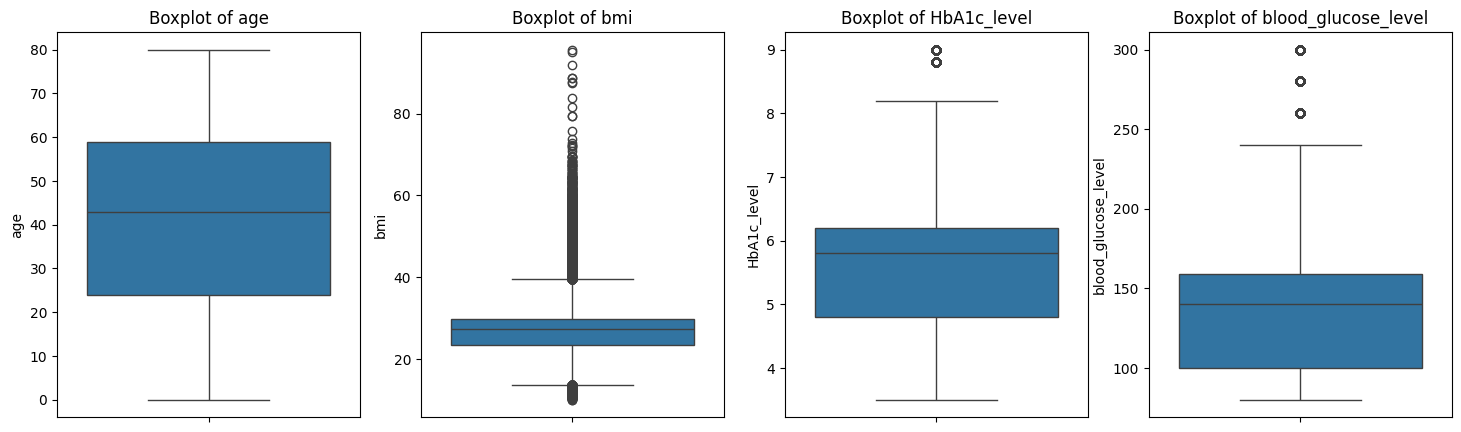

In [ ]:
numeric_cols = ['age',	'bmi',	'HbA1c_level',	'blood_glucose_level']
plt.figure(figsize=(18, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(data=data[col])
    plt.title(f'Boxplot of {col}')

Đối với tập dữ liệu này ta sẽ không xử lý các dữ liệu ngoại lai vì các lý do sau:

*   age:  Các giá trị gần 0 có thể là hợp lệ, chẳng hạn như trẻ sơ sinh hoặc trẻ nhỏ có thể bị tiểu đường do yếu tố di truyền.
*   bmi: Những giá trị BMI rất cao có thể đại diện cho các tình trạng y tế đặc biệt hoặc nhóm đối tượng cụ thể có ý nghĩa trong bối cảnh nghiên cứu y tế. Việc loại bỏ những giá trị này có thể làm mất thông tin quan trọng cho việc dự đoán bệnh tiểu đường.
*   HbA1c_level: Mức HbA1c cao có thể cho thấy tình trạng kiểm soát đường huyết kém, và có ý nghĩa y tế.
*   blood_glucose_level: Mức đường huyết cao thường xuất hiện ở những người có vấn đề với đường huyết hoặc đã mắc bệnh tiểu đường.
Loại bỏ những giá trị này làm mất các chỉ số quan trọng cho dự đoán bệnh.





---



# **Chuẩn hóa dữ liệu**

In [ ]:
df_train = data.iloc[:,:-1]
df_train = pd.get_dummies(df_train, columns= ['gender', 'smoking_history'], drop_first=False)
y = data.iloc[:,-1]
df_train.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,0,1,25.19,6.6,140,True,False,False,False,False,False,False,True,False
1,54,0,0,27.32,6.6,80,True,False,False,True,False,False,False,False,False
2,28,0,0,27.32,5.7,158,False,True,False,False,False,False,False,True,False
3,36,0,0,23.45,5.0,155,True,False,False,False,True,False,False,False,False
4,76,1,1,20.14,4.8,155,False,True,False,False,True,False,False,False,False


In [ ]:
scaler = StandardScaler()
df = scaler.fit_transform(df_train)
X = pd.DataFrame(df, columns=df_train.columns)
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.699910,-0.290106,4.847640,-0.314977,0.994503,0.043484,0.843768,-0.843443,-0.013686,-0.720653,-0.325294,-0.208333,-0.327285,1.339446,-0.266356
1,0.542955,-0.290106,-0.206286,-0.000284,0.994503,-1.423111,0.843768,-0.843443,-0.013686,1.387630,-0.325294,-0.208333,-0.327285,-0.746577,-0.266356
2,-0.614000,-0.290106,-0.206286,-0.000284,0.155953,0.483463,-1.185160,1.185617,-0.013686,-0.720653,-0.325294,-0.208333,-0.327285,1.339446,-0.266356
3,-0.258014,-0.290106,-0.206286,-0.572050,-0.496252,0.410133,0.843768,-0.843443,-0.013686,-0.720653,3.074144,-0.208333,-0.327285,-0.746577,-0.266356
4,1.521917,3.447016,4.847640,-1.061081,-0.682596,0.410133,-1.185160,1.185617,-0.013686,-0.720653,3.074144,-0.208333,-0.327285,-0.746577,-0.266356


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96112 entries, 0 to 96111
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          96112 non-null  float64
 1   hypertension                 96112 non-null  float64
 2   heart_disease                96112 non-null  float64
 3   bmi                          96112 non-null  float64
 4   HbA1c_level                  96112 non-null  float64
 5   blood_glucose_level          96112 non-null  float64
 6   gender_Female                96112 non-null  float64
 7   gender_Male                  96112 non-null  float64
 8   gender_Other                 96112 non-null  float64
 9   smoking_history_No Info      96112 non-null  float64
 10  smoking_history_current      96112 non-null  float64
 11  smoking_history_ever         96112 non-null  float64
 12  smoking_history_former       96112 non-null  float64
 13  smoking_history_

# **Xử lý mất cân bằng dữ liệu**

In [ ]:
count_diabetes = data['diabetes'].value_counts()
count_diabetes

,count
diabetes,
0,87630
1,8482


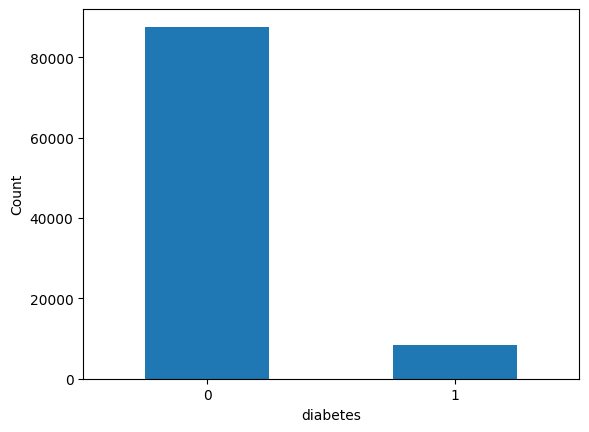

In [ ]:
count_diabetes.plot(kind='bar')
plt.xticks(rotation=360)
plt.ylabel('Count');

diabetes
0    87630
1    87630
Name: count, dtype: int64


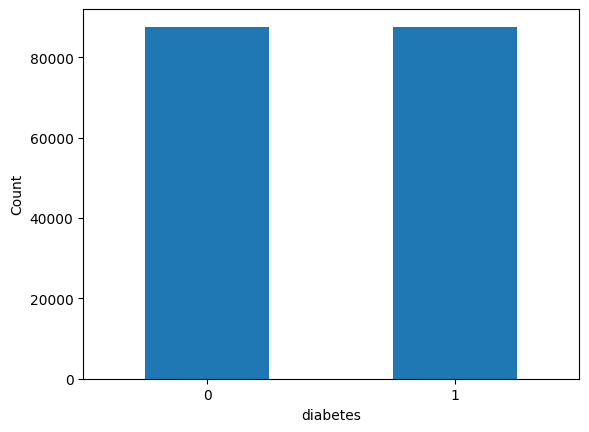

In [ ]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
print(y.value_counts())
y.value_counts().plot(kind='bar')
plt.xticks(rotation=360)
plt.ylabel('Count');

# **Feature Selection**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=KFold(5), scoring='r2')
rfecv.fit(X, y)
X_selected = X.loc[:, rfecv.support_]

# Kết quả
print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected Features: %s" % X.columns[rfecv.support_])
print("Feature Ranking: %s" % rfecv.ranking_)

Optimal number of features: 10
Selected Features: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info'],
      dtype='object')
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 2 5 3 4 6]


In [ ]:
X_selected

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info
0,1.699910,-0.290106,4.847640,-0.314977,0.994503,0.043484,0.843768,-0.843443,-0.013686,-0.720653
1,0.542955,-0.290106,-0.206286,-0.000284,0.994503,-1.423111,0.843768,-0.843443,-0.013686,1.387630
2,-0.614000,-0.290106,-0.206286,-0.000284,0.155953,0.483463,-1.185160,1.185617,-0.013686,-0.720653
3,-0.258014,-0.290106,-0.206286,-0.572050,-0.496252,0.410133,0.843768,-0.843443,-0.013686,-0.720653
4,1.521917,3.447016,4.847640,-1.061081,-0.682596,0.410133,-1.185160,1.185617,-0.013686,-0.720653
...,...,...,...,...,...,...,...,...,...,...
175255,1.038353,-0.290106,-0.206286,1.258738,1.140455,2.487810,-1.185160,1.185617,-0.013686,-0.720653
175256,1.260227,-0.290106,-0.206286,0.347050,1.180847,-0.287660,0.843768,-0.843443,-0.013686,-0.720653
175257,1.007688,-0.290106,-0.206286,0.668473,1.228479,3.954406,-1.185160,1.185617,-0.013686,-0.720653
175258,1.511752,-0.290106,-0.206286,2.326293,1.106977,0.417469,-1.185160,1.185617,-0.013686,-0.720653


# **LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_selected, y)

In [ ]:
X_LDA = pd.DataFrame(X_lda)
X_LDA.head()

,0
0,0.715175
1,-0.926347
2,-0.863188
3,-1.451894
4,0.011411


# **Huấn luyện mô hình sử dụng LDA**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_LDA, y, stratify = y, test_size=0.2 ,random_state=42)

* **Logistic Regression**

In [ ]:
model =  LogisticRegression(random_state = 42)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Thời gian huấn luyện mô hình: {training_time:.4f} giây")
y_pred = model.predict(X_test)

Thời gian huấn luyện mô hình: 0.1878 giây


In [ ]:
print("Accuracy:(Độ chính xác)",accuracy_score(y_test, y_pred))
print("Precision: (Độ chuẩn xác)",precision_score(y_test, y_pred))
print("Recall: (Độ bao phủ)",recall_score(y_test, y_pred))
print("F1-score: (F1-score)",f1_score(y_test, y_pred))

Accuracy:(Độ chính xác) 0.885883829738674
Precision: (Độ chuẩn xác) 0.8865896878929919
Recall: (Độ bao phủ) 0.8849709003765833
F1-score: (F1-score) 0.8857795545402626


In [ ]:
print("Logistic Regression")
print('Classification Report:\n', classification_report(y_test, y_pred))

Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     17526
           1       0.89      0.88      0.89     17526

    accuracy                           0.89     35052
   macro avg       0.89      0.89      0.89     35052
weighted avg       0.89      0.89      0.89     35052



* **Decision Tree**

In [ ]:
model = DecisionTreeClassifier(random_state = 42)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Thời gian huấn luyện mô hình: {training_time:.4f} giây")
y_pred = model.predict(X_test)

Thời gian huấn luyện mô hình: 1.0965 giây


In [ ]:
print("Accuracy:(Độ chính xác)",accuracy_score(y_test, y_pred))
print("Precision: (Độ chuẩn xác)",precision_score(y_test, y_pred))
print("Recall: (Độ bao phủ)",recall_score(y_test, y_pred))
print("F1-score: (F1-score)",f1_score(y_test, y_pred))

Accuracy:(Độ chính xác) 0.8465993381262125
Precision: (Độ chuẩn xác) 0.8491693970224752
Recall: (Độ bao phủ) 0.8429190916352847
F1-score: (F1-score) 0.8460327005125562


In [ ]:
print("Decision Tree")
print(classification_report(y_test, y_pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     17526
           1       0.85      0.84      0.85     17526

    accuracy                           0.85     35052
   macro avg       0.85      0.85      0.85     35052
weighted avg       0.85      0.85      0.85     35052



* **RandomForest**

In [ ]:
model = RandomForestClassifier(random_state = 42)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Thời gian huấn luyện mô hình: {training_time:.4f} giây")
y_pred = model.predict(X_test)

Thời gian huấn luyện mô hình: 47.4012 giây


In [ ]:
print("Accuracy:(Độ chính xác)",accuracy_score(y_test, y_pred))
print("Precision: (Độ chuẩn xác)",precision_score(y_test, y_pred))
print("Recall: (Độ bao phủ)",recall_score(y_test, y_pred))
print("F1-score: (F1-score)",f1_score(y_test, y_pred))

Accuracy:(Độ chính xác) 0.8464566929133859
Precision: (Độ chuẩn xác) 0.8486449242076252
Recall: (Độ bao phủ) 0.8433184982311993
F1-score: (F1-score) 0.8459733272279778


In [ ]:
print("Random Forest")
print(classification_report(y_test, y_pred))

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     17526
           1       0.85      0.84      0.85     17526

    accuracy                           0.85     35052
   macro avg       0.85      0.85      0.85     35052
weighted avg       0.85      0.85      0.85     35052



# **Huấn luyện mô hình không dùng LDA**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, stratify = y,test_size=0.2 ,random_state=42)

* **Logistic Regression**

In [ ]:
model =  LogisticRegression(random_state = 42)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Thời gian huấn luyện mô hình: {training_time:.4f} giây")
y_pred = model.predict(X_test)


Thời gian huấn luyện mô hình: 0.3186 giây


In [ ]:
print("Accuracy:(Độ chính xác)",accuracy_score(y_test, y_pred))
print("Precision: (Độ chuẩn xác)",precision_score(y_test, y_pred))
print("Recall: (Độ bao phủ)",recall_score(y_test, y_pred))
print("F1-score: (F1-score)",f1_score(y_test, y_pred))
print("Logistic Regression")
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy:(Độ chính xác) 0.8847997261211914
Precision: (Độ chuẩn xác) 0.886254295532646
Recall: (Độ bao phủ) 0.8829168093118795
F1-score: (F1-score) 0.8845824043903275
Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89     17526
           1       0.89      0.88      0.88     17526

    accuracy                           0.88     35052
   macro avg       0.88      0.88      0.88     35052
weighted avg       0.88      0.88      0.88     35052



* **Decision Tree**

In [ ]:
model = DecisionTreeClassifier(random_state = 42)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Thời gian huấn luyện mô hình: {training_time:.4f} giây")
y_pred = model.predict(X_test)

Thời gian huấn luyện mô hình: 0.5889 giây


In [ ]:
print("Accuracy:(Độ chính xác)",accuracy_score(y_test, y_pred))
print("Precision: (Độ chuẩn xác)",precision_score(y_test, y_pred))
print("Recall: (Độ bao phủ)",recall_score(y_test, y_pred))
print("F1-score: (F1-score)",f1_score(y_test, y_pred))
print("Decision Tree")
print(classification_report(y_test, y_pred))

Accuracy:(Độ chính xác) 0.9625984251968503
Precision: (Độ chuẩn xác) 0.9620447939818773
Recall: (Độ bao phủ) 0.9631975350907224
F1-score: (F1-score) 0.9626208194337524
Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17526
           1       0.96      0.96      0.96     17526

    accuracy                           0.96     35052
   macro avg       0.96      0.96      0.96     35052
weighted avg       0.96      0.96      0.96     35052



* **RandomForest**

In [ ]:
model = RandomForestClassifier(random_state = 42)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Thời gian huấn luyện mô hình: {training_time:.4f} giây")
y_pred = model.predict(X_test)

Thời gian huấn luyện mô hình: 33.9707 giây


In [ ]:
print("Accuracy:(Độ chính xác)",accuracy_score(y_test, y_pred))
print("Precision: (Độ chuẩn xác)",precision_score(y_test, y_pred))
print("Recall: (Độ bao phủ)",recall_score(y_test, y_pred))
print("F1-score: (F1-score)",f1_score(y_test, y_pred))
print("Random Forest")
print(classification_report(y_test, y_pred))

Accuracy:(Độ chính xác) 0.9739815131804177
Precision: (Độ chuẩn xác) 0.9736031927023945
Recall: (Độ bao phủ) 0.9743809197763323
F1-score: (F1-score) 0.9739919009867108
Random Forest
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17526
           1       0.97      0.97      0.97     17526

    accuracy                           0.97     35052
   macro avg       0.97      0.97      0.97     35052
weighted avg       0.97      0.97      0.97     35052

